In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

In [2]:
data = pd.read_excel("/home/mann-saradva/Desktop/hackathon/Hackthon Train Data.xlsx")

data

,ACCT_NUMBER,BALANCE,SANCTIONAMOUNT,COLLATERALTYPE,COLLATERALVALUE,CREDITLIMIT,DATECLOSED,DATEOPENED,HIGHCREDIT,INSTALLMENTAMOUNT,PASTDUEAMOUNT,REPAYMENTTENURE,TERMFREQUENCY,SELF_TRADE,SECTOR,DOB,Defaulter
0,1024,0.0,50000,NaN,0.0,0.0,2021-09-04,2019-11-29,50000.0,1195.0,0.0,52.0,Bi-weekly,N,NBFC,1971-01-01,0
1,1025,71704.0,80000,NaN,0.0,0.0,NaT,2021-09-04,80000.0,4146.0,0.0,24.0,Monthly,N,NBFC,1971-01-01,0
2,1026,0.0,15000,NaN,NaN,NaN,2014-12-16,2014-01-03,NaN,358.0,0.0,NaN,Monthly,NaN,NaN,1988-05-10,0
3,1027,0.0,20000,NaN,NaN,NaN,2018-02-15,2017-03-15,NaN,907.0,NaN,NaN,Bi-weekly,NaN,NaN,1988-05-10,0
4,1028,21795.0,21795,NaN,NaN,NaN,NaT,2021-08-15,NaN,NaN,0.0,NaN,Monthly,NaN,NaN,1978-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,11694,4810.0,30000,NaN,NaN,NaN,NaT,2019-02-18,NaN,1650.0,4950.0,NaN,Monthly,NaN,NaN,1989-01-01,1
10671,11695,43346.0,50000,NaN,NaN,NaN,NaT,2020-01-27,NaN,1800.0,2100.0,NaN,Monthly,NaN,NaN,1989-01-01,1
10672,11696,16524.0,30000,NaN,NaN,NaN,NaT,2020-02-13,NaN,1500.0,10210.0,NaN,Other,NaN,NaN,1989-01-01,1
10673,11697,1648.0,30000,NaN,NaN,NaN,NaT,2019-02-18,NaN,1650.0,1650.0,NaN,Monthly,NaN,NaN,1977-01-01,1


In [3]:
data.isnull().sum()

ACCT_NUMBER             0
BALANCE               124
SANCTIONAMOUNT          0
COLLATERALTYPE       9807
COLLATERALVALUE      4430
CREDITLIMIT          4430
DATECLOSED           6102
DATEOPENED              9
HIGHCREDIT           4430
INSTALLMENTAMOUNT     506
PASTDUEAMOUNT         435
REPAYMENTTENURE      7984
TERMFREQUENCY        3681
SELF_TRADE           4430
SECTOR               4430
DOB                     0
Defaulter               0
dtype: int64

In [4]:
data = data.dropna(subset=['INSTALLMENTAMOUNT', 'PASTDUEAMOUNT'])

data

,ACCT_NUMBER,BALANCE,SANCTIONAMOUNT,COLLATERALTYPE,COLLATERALVALUE,CREDITLIMIT,DATECLOSED,DATEOPENED,HIGHCREDIT,INSTALLMENTAMOUNT,PASTDUEAMOUNT,REPAYMENTTENURE,TERMFREQUENCY,SELF_TRADE,SECTOR,DOB,Defaulter
0,1024,0.0,50000,NaN,0.0,0.0,2021-09-04,2019-11-29,50000.0,1195.0,0.0,52.0,Bi-weekly,N,NBFC,1971-01-01,0
1,1025,71704.0,80000,NaN,0.0,0.0,NaT,2021-09-04,80000.0,4146.0,0.0,24.0,Monthly,N,NBFC,1971-01-01,0
2,1026,0.0,15000,NaN,NaN,NaN,2014-12-16,2014-01-03,NaN,358.0,0.0,NaN,Monthly,NaN,NaN,1988-05-10,0
5,1029,49439.0,50000,NaN,0.0,0.0,NaT,2020-01-28,50000.0,0.0,0.0,NaN,NaN,N,BANKS,1984-01-01,0
6,1030,0.0,33000,NaN,0.0,0.0,2019-01-15,2018-10-16,33000.0,0.0,0.0,NaN,Monthly,N,BANKS,1977-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,11694,4810.0,30000,NaN,NaN,NaN,NaT,2019-02-18,NaN,1650.0,4950.0,NaN,Monthly,NaN,NaN,1989-01-01,1
10671,11695,43346.0,50000,NaN,NaN,NaN,NaT,2020-01-27,NaN,1800.0,2100.0,NaN,Monthly,NaN,NaN,1989-01-01,1
10672,11696,16524.0,30000,NaN,NaN,NaN,NaT,2020-02-13,NaN,1500.0,10210.0,NaN,Other,NaN,NaN,1989-01-01,1
10673,11697,1648.0,30000,NaN,NaN,NaN,NaT,2019-02-18,NaN,1650.0,1650.0,NaN,Monthly,NaN,NaN,1977-01-01,1


In [5]:
data.drop(data[data['BALANCE'] < 0].index,axis=0, inplace=True)
data.drop(data[data['BALANCE'].isnull()].index, axis=0, inplace=True)
data.drop(data[data['DATEOPENED'].isnull()].index, axis=0, inplace=True)

In [6]:
data.drop(['HIGHCREDIT'], axis=1,inplace=True)
data.drop(['COLLATERALTYPE'], axis=1,inplace=True)

In [7]:
data['SELF_TRADE'].fillna("Y", inplace=True)
data['DATECLOSED'].fillna(dt.datetime.today().strftime("%m-%d-%Y"), inplace=True)

<AxesSubplot:xlabel='SELF_TRADE'>

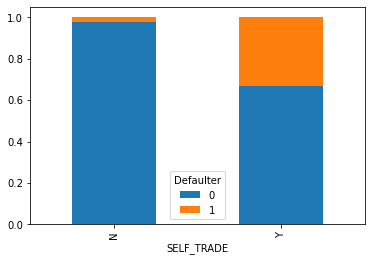

In [8]:
SELF_TRADE=pd.crosstab(data['SELF_TRADE'],data['Defaulter'])
SELF_TRADE.div(SELF_TRADE.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

In [9]:
def find_age_from_DOB(dob):
   
    today = date.today()
   
    age_year=today.year - dob.year
   
    month_difference= abs(dob.month - today.month)
   
    if month_difference > 6:
       
        age_year+=1
       
    return age_year

data['AGE']=data['DOB'].apply(find_age_from_DOB)

data.drop(['DOB'], axis=1,inplace=True)

In [10]:
data

,ACCT_NUMBER,BALANCE,SANCTIONAMOUNT,COLLATERALVALUE,CREDITLIMIT,DATECLOSED,DATEOPENED,INSTALLMENTAMOUNT,PASTDUEAMOUNT,REPAYMENTTENURE,TERMFREQUENCY,SELF_TRADE,SECTOR,Defaulter,AGE
0,1024,0.0,50000,0.0,0.0,2021-09-04,2019-11-29,1195.0,0.0,52.0,Bi-weekly,N,NBFC,0,52
1,1025,71704.0,80000,0.0,0.0,2022-11-12,2021-09-04,4146.0,0.0,24.0,Monthly,N,NBFC,0,52
2,1026,0.0,15000,NaN,NaN,2014-12-16,2014-01-03,358.0,0.0,NaN,Monthly,Y,NaN,0,34
5,1029,49439.0,50000,0.0,0.0,2022-11-12,2020-01-28,0.0,0.0,NaN,NaN,N,BANKS,0,39
6,1030,0.0,33000,0.0,0.0,2019-01-15,2018-10-16,0.0,0.0,NaN,Monthly,N,BANKS,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,11694,4810.0,30000,NaN,NaN,2022-11-12,2019-02-18,1650.0,4950.0,NaN,Monthly,Y,NaN,1,34
10671,11695,43346.0,50000,NaN,NaN,2022-11-12,2020-01-27,1800.0,2100.0,NaN,Monthly,Y,NaN,1,34
10672,11696,16524.0,30000,NaN,NaN,2022-11-12,2020-02-13,1500.0,10210.0,NaN,Other,Y,NaN,1,34
10673,11697,1648.0,30000,NaN,NaN,2022-11-12,2019-02-18,1650.0,1650.0,NaN,Monthly,Y,NaN,1,46


In [11]:
data.isnull().sum()

ACCT_NUMBER             0
BALANCE                 0
SANCTIONAMOUNT          0
COLLATERALVALUE      3528
CREDITLIMIT          3528
DATECLOSED              0
DATEOPENED              0
INSTALLMENTAMOUNT       0
PASTDUEAMOUNT           0
REPAYMENTTENURE      7039
TERMFREQUENCY        3652
SELF_TRADE              0
SECTOR               3528
Defaulter               0
AGE                     0
dtype: int64

In [12]:
data['COLLATERALVALUE'] = data['COLLATERALVALUE'].fillna(0)  
data['CREDITLIMIT'] = data['CREDITLIMIT'].fillna(0)  
data['SECTOR'] = data['SECTOR'].fillna("OTHER2")  

In [13]:
data.isnull().sum()

ACCT_NUMBER             0
BALANCE                 0
SANCTIONAMOUNT          0
COLLATERALVALUE         0
CREDITLIMIT             0
DATECLOSED              0
DATEOPENED              0
INSTALLMENTAMOUNT       0
PASTDUEAMOUNT           0
REPAYMENTTENURE      7039
TERMFREQUENCY        3652
SELF_TRADE              0
SECTOR                  0
Defaulter               0
AGE                     0
dtype: int64

In [14]:
def find_days(open_date,close_date):
   
    total_days=[]
    for d1,d2 in zip(close_date,open_date):
       
        total_days.append((d1-d2).days)
       
    return total_days

data['DAYS']=find_days(data['DATEOPENED'],data['DATECLOSED'])

In [15]:
data.drop(['DATEOPENED'], axis=1,inplace=True)
data.drop(['DATECLOSED'], axis=1,inplace=True)

In [16]:
data.isnull().sum()

ACCT_NUMBER             0
BALANCE                 0
SANCTIONAMOUNT          0
COLLATERALVALUE         0
CREDITLIMIT             0
INSTALLMENTAMOUNT       0
PASTDUEAMOUNT           0
REPAYMENTTENURE      7039
TERMFREQUENCY        3652
SELF_TRADE              0
SECTOR                  0
Defaulter               0
AGE                     0
DAYS                    0
dtype: int64

In [17]:
data.drop(['REPAYMENTTENURE'], axis=1,inplace=True)

In [18]:
data.drop(data[data['TERMFREQUENCY'].isnull()].index, axis=0, inplace=True)

In [19]:
data.isnull().sum()

ACCT_NUMBER          0
BALANCE              0
SANCTIONAMOUNT       0
COLLATERALVALUE      0
CREDITLIMIT          0
INSTALLMENTAMOUNT    0
PASTDUEAMOUNT        0
TERMFREQUENCY        0
SELF_TRADE           0
SECTOR               0
Defaulter            0
AGE                  0
DAYS                 0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6065 entries, 0 to 10674
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ACCT_NUMBER        6065 non-null   int64  
 1   BALANCE            6065 non-null   float64
 2   SANCTIONAMOUNT     6065 non-null   int64  
 3   COLLATERALVALUE    6065 non-null   float64
 4   CREDITLIMIT        6065 non-null   float64
 5   INSTALLMENTAMOUNT  6065 non-null   float64
 6   PASTDUEAMOUNT      6065 non-null   float64
 7   TERMFREQUENCY      6065 non-null   object 
 8   SELF_TRADE         6065 non-null   object 
 9   SECTOR             6065 non-null   object 
 10  Defaulter          6065 non-null   int64  
 11  AGE                6065 non-null   int64  
 12  DAYS               6065 non-null   int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 663.4+ KB


In [21]:
le = LabelEncoder()

categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

print(categorical_columns)

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

['TERMFREQUENCY', 'SELF_TRADE', 'SECTOR']


In [23]:
target = ['Defaulter']

predictors = [x for x in data.columns if x not in ['ACCT_NUMBER','Defaulter']]

X = data[predictors]
y = data[target]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

LR = LogisticRegression()

model = LR.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_test  = y_test

print("Test Accuracy :",accuracy_score(y_test,y_pred))
print("Recall :",recall_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_pred,y_test,labels=[1,0]))

Test Accuracy : 0.8087386644682605
Recall : 0.06550218340611354
Precision : 0.45454545454545453
Confusion Matrix :
 [[ 15  18]
 [214 966]]


## Decision Tree 

In [25]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=10,min_samples_leaf=50)
model = DT.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_test  = y_test

print("Test Accuracy :",accuracy_score(y_test,y_pred))
print("Recall :",recall_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_pred,y_test,labels=[1,0]))

Test Accuracy : 0.9249793899422918
Recall : 0.8602620087336245
Precision : 0.76953125
Confusion Matrix :
 [[197  59]
 [ 32 925]]


## Random Forest 

In [26]:
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV

# Number of trees 
n_estimators = [4,5,9,10,16,20,40,60,100,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,50,40]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 20, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, y)
rf_random.best_params_

{'bootstrap': [True, False],
 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [10, 20, 30, 50, 40],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 5, 9, 10, 16, 20, 40, 60, 100, 300]}
Fitting 20 folds for each of 100 candidates, totalling 2000 fits


/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=19, max_featu

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=60; total time=   0.5s
[CV] END bootstrap=True, max_depth=46,

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=19, max_fe

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=19, max

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=46,

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=50, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=60; total time=   0.9s
[CV] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=30, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=10, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=10, n_estimators=4; total time=   0.0s
[CV] END bootstrap=True, max_depth=82, m

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.8s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=40, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=40, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=40, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=91, ma

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   1.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=82, max

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.9s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=40, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=82, ma

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=16; total time=   0.2s
[CV] END bootstrap=True, max_depth=28, max_featu

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=9; total time=   0.2s
[CV] END bootstrap=False, max_depth=91, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=28, max_features=auto, min_samples_leaf=20, min_samples_split=5, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=28, max_featur

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=28, max_features=auto, min_samples_leaf=20, min_samples_split=5, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=28, max_features=auto, min_samples_leaf=20, min_samples_split=5, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=9; total time=   0.2s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=73, max_fe

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END bootstrap=True, max_depth=28, max_features=auto, min_samples_leaf=20, min_samples_split=5, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=28, max_features=auto, min_samples_leaf=20, min_samples_split=5, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=40; total time=   0.5s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=40; total time=   0.5s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=37, max_f

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=37, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=16; total time=   0.2s
[CV] END bootstrap=True, max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=16; total time=   0.2s
[CV] END bootstrap=False, max_depth=64, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=64, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=64, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=64, max_

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=82, max_features=sqrt, min_samples_leaf=40, min_samples_split=10, n_estimators=300; total time=   3.2s
[CV] END bootstrap=True, max_depth=82, max_features=sqrt, min_samples_leaf=40, min_samples_split=10, n_estimators=300; total time=   2.8s
[CV] END bootstrap=False, max_d

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=40, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=91, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=91, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=91,

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=28, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=82, max_features=sqrt, min_samples_leaf=40, min_samples_split=10, n_estimators=300; total time=   3.3s
[CV] END bootstrap=True, max_depth=82, max_features=sqrt, min_samples_leaf=40, min_samples_split=10, n_estimators=300; total time=   3.7s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=20; total time=   0.4s
[CV] END bootstrap=False, max_d

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=50, min_samples_split=5, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=50, min_samples_split=5, n_estimators=40; total time=   0.4s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=16; total time=   0.2s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=16; total time=   0.2s
[CV] END bootstrap=False, max_depth=82, m

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=91, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=91, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=4; total time=   0.1s
[CV] END bootstrap=True, max_depth=82, max_features=sqrt, min_samples_leaf=40, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV] END bootstrap=True, max_depth=82, max_features=sqrt, min_samples_leaf=40, min_samples_split=10, n_estimators=300; total time=   3.0s
[CV] END bootstrap=True, max_depth=82, max_features=sqrt, min_samples_leaf=40, min_samples_split=10, n_estimators=300; total time=   2.7s
[CV] END bootstrap=False, max_depth=73, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.3s
[CV] END bootstrap=False, max_depth=73, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=82, ma

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=False, max_depth=82, max_features=sqrt, min_samples_leaf=50, min_samples_split=5, n_estimators=40; total time=   0.4s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=82, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=16; total time=   0.3s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=16; total time=   0.2s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=16; total time=   0.3s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=16; total time=   0.5s
[CV] END bootstrap=True, max_depth=19, ma

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=73, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=73, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=73, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=73, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=73, max_features=

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=73, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=40, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=40, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=40, min_samples_split=5, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=40, min_samples_split=5, n_estimators=4; total time=   0.1s
[CV] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=40, min_samples_split=5, n_estimators=4; total time=   0.0s
[CV] END bootstrap=False, max_depth=46, max_features=sqrt, min_samples_leaf=40, min_samples_split=5, n_estimators=4; total time=   0.1s
[CV] END bootstrap=False, max_depth=46, max_fea

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=46, max_features=auto, min_samples_leaf=50, min_samples_split=5, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=16; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=16; total time=   0.2s
[CV] END bootstrap=True, max_depth=73

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=37, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=37, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=16; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=300; total time=   3.5s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=300; total time=   4.3s
[CV] END bootstrap=False, max_dept

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=40, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=46, max_features=sqrt, min_samples_leaf=40, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=   0.9s
[CV] END bootstrap=True, max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=20; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=No

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=16; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=30, min_samples_split=10, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth=73, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=   0.6s
[CV] END bootstrap=True, max_depth

/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/mann-saradva/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_valida

[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=9; total time=   0.2s
[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=9; total time=   0.2s
[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=55, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 55,
 'bootstrap': False}

In [27]:
RF = RandomForestClassifier(**rf_random.best_params_)

model = RF.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_test  = y_test

print("Test Accuracy :",accuracy_score(y_test,y_pred))
print("Recall :",recall_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_pred,y_test,labels=[1,0]))

Test Accuracy : 0.9579554822753503
Recall : 0.8777292576419214
Precision : 0.8973214285714286
Confusion Matrix :
 [[201  23]
 [ 28 961]]


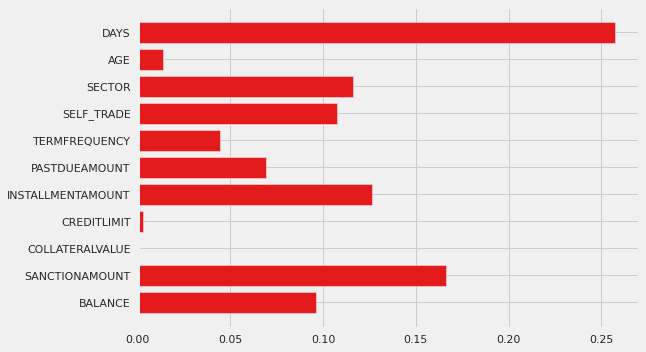

In [28]:
# feature importance
plt.barh(predictors, model.feature_importances_)
plt.show()

## XGBoost 

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

random_grid = {
    'n_estimators': [4,5,9,10,16,20,40,60,100,300],
    'learning_rate': [0.01,0.1,0.2,0.3,0.03,0.5,0.6,0.8,0.9,1],
    'max_depth':[3,5,7,10,15],
     'min_child_weight':[2,3,5,6,8,10],
     'gamma': [i/10.0 for i in range(0,5)]
}
XGB = XGBClassifier()
XGB_random = RandomizedSearchCV(estimator = XGB, param_distributions = random_grid, n_iter = 100, cv = 20, verbose=2, random_state=42, n_jobs = -1)
XGB_random.fit(X, y)
XGB_random.best_params_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits
[CV] END bootstrap=False, max_depth=82, max_features=auto, min_samples_leaf=50, min_samples_split=10, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=9; total time=   0.1s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=9; total time=   0.2s
[CV] END bootstrap=True, max_depth=37, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=16; total time=   0.1s
[CV] END bootstrap=True, max_depth=37, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=16; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_estimators=300; total time=   4.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=20, min_samples_split=10, n_esti

[CV] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, max_depth=55, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=9; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_feat

[CV] END bootstrap=True, max_depth=28, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=40; total time=   0.5s
[CV] END bootstrap=True, max_depth=28, max_features=auto, min_samples_leaf=40, min_samples_split=5, n_estimators=40; total time=   0.4s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=19, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=20, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=10

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=30, min_samples_split=5, n_estimators=300; total time=   3.0s
[CV] END gamma=0.2, learning_rate=0.03, max_depth=5, min_child_weight=3, n_estimators=4; total time=   0.1s
[CV] END gamma=0.2, learning_rate=0.03, max_depth=5, min_child_weight=3, n_estimators=4; total time=   0.1s
[CV] END gamma=0.2, learning_rate=0.03, max_depth=5, min_child_weight=3, n_estimators=4; total time=   0.2s
[CV] END gamma=0.2, learning_rate=0.03, max_depth=5, min_child_weight=3, n_estimators=4; total time=   0.2s
[CV] END gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=4; total time=   0.1s
[CV] END gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5, n_estimators=4; total time=   0.1s
[CV] END gamma=0.1, learning_rate=0.8, max_depth=15, min_child_weight=10, n_estimators=4; total time=   0.1s
[CV] END gamma=0.1, learning_rate=0.8, max_depth=15, min_child_weight=10, n_estimators=4; total time=   0.

[CV] END gamma=0.4, learning_rate=0.9, max_depth=3, min_child_weight=5, n_estimators=10; total time=   0.1s
[CV] END gamma=0.4, learning_rate=0.9, max_depth=3, min_child_weight=5, n_estimators=10; total time=   0.1s
[CV] END gamma=0.4, learning_rate=0.9, max_depth=3, min_child_weight=5, n_estimators=10; total time=   0.1s
[CV] END gamma=0.4, learning_rate=0.9, max_depth=3, min_child_weight=5, n_estimators=10; total time=   0.2s
[CV] END gamma=0.4, learning_rate=0.9, max_depth=3, min_child_weight=5, n_estimators=10; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.9, max_depth=10, min_child_weight=10, n_estimators=40; total time=   0.8s
[CV] END gamma=0.3, learning_rate=0.9, max_depth=10, min_child_weight=10, n_estimators=40; total time=   0.8s
[CV] END gamma=0.3, learning_rate=0.9, max_depth=10, min_child_weight=10, n_estimators=40; total time=   0.7s
[CV] END gamma=0.3, learning_rate=0.8, max_depth=15, min_child_weight=5, n_estimators=10; total time=   0.3s
[CV] END gamma=0.3, l

[CV] END gamma=0.4, learning_rate=0.6, max_depth=3, min_child_weight=2, n_estimators=10; total time=   0.1s
[CV] END gamma=0.4, learning_rate=0.6, max_depth=3, min_child_weight=2, n_estimators=10; total time=   0.2s
[CV] END gamma=0.4, learning_rate=0.6, max_depth=3, min_child_weight=2, n_estimators=10; total time=   0.1s
[CV] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=8, n_estimators=300; total time=   3.3s
[CV] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=8, n_estimators=300; total time=   3.2s
[CV] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=8, n_estimators=300; total time=   3.5s
[CV] END gamma=0.1, learning_rate=0.6, max_depth=15, min_child_weight=3, n_estimators=5; total time=   0.2s
[CV] END gamma=0.1, learning_rate=0.6, max_depth=15, min_child_weight=3, n_estimators=5; total time=   0.2s
[CV] END gamma=0.1, learning_rate=0.6, max_depth=15, min_child_weight=3, n_estimators=5; total time=   0.2s
[CV] END gamma=0.1, learn

[CV] END gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=8, n_estimators=16; total time=   0.7s
[CV] END gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=8, n_estimators=16; total time=   0.5s
[CV] END gamma=0.1, learning_rate=0.5, max_depth=3, min_child_weight=10, n_estimators=20; total time=   0.3s
[CV] END gamma=0.1, learning_rate=0.5, max_depth=3, min_child_weight=10, n_estimators=20; total time=   0.2s
[CV] END gamma=0.1, learning_rate=0.5, max_depth=3, min_child_weight=10, n_estimators=20; total time=   0.4s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=20; total time=   0.4s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=20; total time=   0.3s
[CV] END gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300; total time=   3.6s
[CV] END gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300; total time=   3.0s
[CV] END gamma=0.4, l

[CV] END gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=4; total time=   0.1s
[CV] END gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=2, n_estimators=4; total time=   0.2s
[CV] END gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=8, n_estimators=16; total time=   0.4s
[CV] END gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=8, n_estimators=16; total time=   0.4s
[CV] END gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=8, n_estimators=16; total time=   0.4s
[CV] END gamma=0.1, learning_rate=0.5, max_depth=3, min_child_weight=10, n_estimators=20; total time=   0.2s
[CV] END gamma=0.1, learning_rate=0.5, max_depth=3, min_child_weight=10, n_estimators=20; total time=   0.3s
[CV] END gamma=0.1, learning_rate=0.5, max_depth=3, min_child_weight=10, n_estimators=20; total time=   0.3s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=20; total time=   0.5s
[CV] END gamma=0.1, lear

[CV] END gamma=0.1, learning_rate=0.5, max_depth=7, min_child_weight=6, n_estimators=100; total time=   1.7s
[CV] END gamma=0.1, learning_rate=0.5, max_depth=7, min_child_weight=6, n_estimators=100; total time=   2.6s
[CV] END gamma=0.0, learning_rate=0.6, max_depth=5, min_child_weight=6, n_estimators=300; total time=   5.1s
[CV] END gamma=0.0, learning_rate=0.6, max_depth=5, min_child_weight=6, n_estimators=300; total time=   5.3s
[CV] END gamma=0.0, learning_rate=0.6, max_depth=5, min_child_weight=6, n_estimators=300; total time=   5.1s
[CV] END gamma=0.0, learning_rate=0.03, max_depth=5, min_child_weight=2, n_estimators=60; total time=   1.5s
[CV] END gamma=0.0, learning_rate=0.03, max_depth=5, min_child_weight=2, n_estimators=60; total time=   1.3s
[CV] END gamma=0.0, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100; total time=   1.5s
[CV] END gamma=0.0, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100; total time=   1.4s
[CV] END gamma=0.3,

[CV] END gamma=0.3, learning_rate=0.6, max_depth=15, min_child_weight=8, n_estimators=4; total time=   0.1s
[CV] END gamma=0.4, learning_rate=0.9, max_depth=5, min_child_weight=8, n_estimators=9; total time=   0.2s
[CV] END gamma=0.4, learning_rate=0.9, max_depth=5, min_child_weight=8, n_estimators=9; total time=   0.2s
[CV] END gamma=0.4, learning_rate=0.9, max_depth=5, min_child_weight=8, n_estimators=9; total time=   0.2s
[CV] END gamma=0.1, learning_rate=0.8, max_depth=15, min_child_weight=10, n_estimators=10; total time=   0.2s
[CV] END gamma=0.1, learning_rate=0.8, max_depth=15, min_child_weight=10, n_estimators=10; total time=   0.3s
[CV] END gamma=0.1, learning_rate=0.8, max_depth=15, min_child_weight=10, n_estimators=10; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.5, max_depth=7, min_child_weight=2, n_estimators=60; total time=   1.5s
[CV] END gamma=0.3, learning_rate=0.5, max_depth=7, min_child_weight=2, n_estimators=60; total time=   1.1s
[CV] END gamma=0.2, learn

[CV] END gamma=0.0, learning_rate=0.03, max_depth=5, min_child_weight=2, n_estimators=60; total time=   1.1s
[CV] END gamma=0.0, learning_rate=0.03, max_depth=5, min_child_weight=2, n_estimators=60; total time=   1.0s
[CV] END gamma=0.0, learning_rate=0.03, max_depth=5, min_child_weight=2, n_estimators=60; total time=   1.1s
[CV] END gamma=0.0, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100; total time=   1.5s
[CV] END gamma=0.0, learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100; total time=   1.4s
[CV] END gamma=0.3, learning_rate=0.8, max_depth=15, min_child_weight=10, n_estimators=16; total time=   0.5s
[CV] END gamma=0.3, learning_rate=0.8, max_depth=15, min_child_weight=10, n_estimators=16; total time=   0.6s
[CV] END gamma=0.3, learning_rate=0.8, max_depth=15, min_child_weight=10, n_estimators=16; total time=   0.6s
[CV] END gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=40; total time=   1.3s
[CV] END gamma=0

[CV] END gamma=0.3, learning_rate=0.03, max_depth=3, min_child_weight=10, n_estimators=10; total time=   0.1s
[CV] END gamma=0.3, learning_rate=0.03, max_depth=3, min_child_weight=10, n_estimators=10; total time=   0.2s
[CV] END gamma=0.2, learning_rate=0.9, max_depth=3, min_child_weight=6, n_estimators=10; total time=   0.1s
[CV] END gamma=0.2, learning_rate=0.9, max_depth=3, min_child_weight=6, n_estimators=10; total time=   0.1s
[CV] END gamma=0.3, learning_rate=0.03, max_depth=3, min_child_weight=6, n_estimators=10; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.03, max_depth=3, min_child_weight=6, n_estimators=10; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.03, max_depth=3, min_child_weight=6, n_estimators=10; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.03, max_depth=3, min_child_weight=6, n_estimators=10; total time=   0.2s
[CV] END gamma=0.3, learning_rate=0.6, max_depth=10, min_child_weight=6, n_estimators=40; total time=   1.0s
[CV] END gamma=0.3,

{'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 15,
 'learning_rate': 0.5,
 'gamma': 0.3}

In [30]:
from xgboost import XGBClassifier

XGB = XGBClassifier(**XGB_random.best_params_)
model = XGB.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_test  = y_test

print("Test Accuracy :",accuracy_score(y_test,y_pred))
print("Recall :",recall_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_pred,y_test,labels=[1,0]))

Test Accuracy : 0.9744435284418796
Recall : 0.9170305676855895
Precision : 0.9459459459459459
Confusion Matrix :
 [[210  12]
 [ 19 972]]


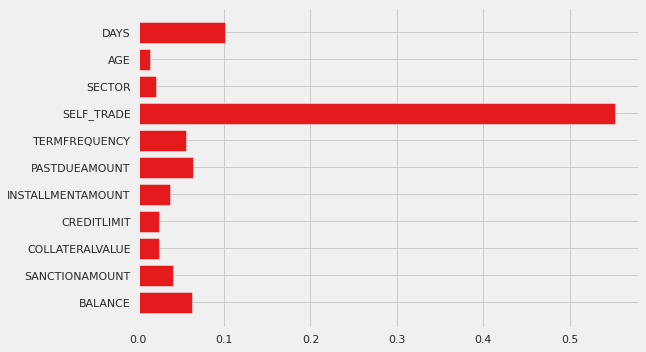

In [31]:
# feature importance
plt.barh(predictors, model.feature_importances_)
plt.show()

In [33]:
import pickle
file_name = "/home/mann-saradva/Desktop/hackathon/xgboost.pkl"

# save
pickle.dump(model, open(file_name, "wb"))